In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:
    
    def __init__(self,X,y,X_label,y_label,title):
        self.X = X
        self.y = y
        self.X_label = X_label
        self.y_label = y_label
        self.title = title
        self.m = 0
        self.b = 0
        
    def get_equation(self):
        avg_X = np.average(self.X)
        avg_y = np.average(self.y)
        
        num = 0
        den = 0
        
        self.m = 0
        self.b = 0
            
        for x,y in zip(self.X,self.y):
            num += (x - avg_X) * (y - avg_y)
            den += (x - avg_X)**2
        
        self.m += num / den 
        self.b += (avg_y - self.m * avg_X)
    
        return self.m, self.b
    
    def get_graph(self):
        plt.plot(self.X,self.y, 'ro')
        x_vals = np.arange(np.amin(self.X),np.amax(self.X))
        plt.plot(x_vals, self.m * x_vals + self.b)
        
        plt.xlabel(self.X_label)
        plt.ylabel(self.y_label)
        plt.title(self.title)
       
    def get_R2(self):
        num = 0
        den = 0
            
        for x,y in zip(self.X,self.y):
            pred = self.m * x + self.b
        
            num += (y - pred) ** 2
            den += (y - np.average(self.y)) ** 2
        
        R2 = 1 - (num / den)
        return R2

# GRE Scores vs Chance of Admittance

In [3]:
GRE_df = pd.read_excel('Admission Predict.xlsx')
GRE_X = GRE_df['GRE Score']
GRE_y = GRE_df['Y']*100

In [4]:
GRE_LinearRegression = LinearRegression(GRE_X,GRE_y,'GRE Score',
                                         'Chance of Admittance',
                                        'GRE Score vs. Chance of Admittance')

In [5]:
GRE_LinearRegression.get_equation()
# m, b

(0.997588202568138, -243.6084244851054)

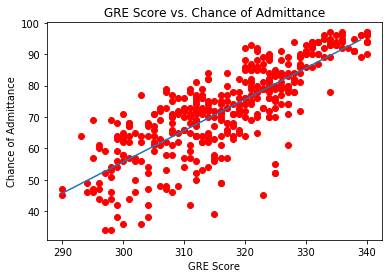

In [6]:
GRE_LinearRegression.get_graph()

In [7]:
GRE_LinearRegression.get_R2()

0.6441835498438337

# Temperature vs Humidity

In [8]:
temp_df = pd.read_csv('weatherHistory.csv')
temp_X = temp_df['Humidity'][:200]*100
temp_y = temp_df['Temperature (C)'][:200]

In [9]:
temp_LinearRegression = LinearRegression(temp_X,temp_y,'Humidity (kg/m^3)',
                                        'Temperature (C)',
                                        'Humidity vs. Temperature')

In [10]:
temp_LinearRegression.get_equation()
# m, b

(-0.21090733095512745, 26.968200249641068)

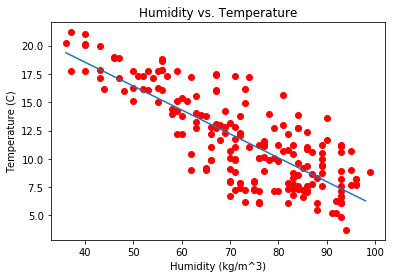

In [11]:
temp_LinearRegression.get_graph()

In [12]:
temp_LinearRegression.get_R2()

0.6210181631836831